# Data Analysis Project: Investigate US Car Dataset


## Data Analysis Project: Investigate US Car Dataset


#  Introduction
For this Data Analyst project, we selected the US Car dataset from kaggle to investigate.It collects 2499 cars and their price along with brands, models, color,status and other related information.The description of each featur can be found in [Here](https://www.kaggle.com/doaaalsenani/usa-cers-dataset/discussion)<br> 

 ### Features :our dataset has 12 Columns 
price : The sale price of the vehicle in the ad<br> 
brand : The brand of car<br> 
model: model of the vehicle<br> 
year: The vehicle registration year<br> 
title_status: This feature included binary classification, which are clean title vehicles and salvage insurance<br> 
mileagemiles: traveled by vehicle<br> 
color: Color of the vehicle<br> 
vinThe: vehicle identification number is a collection of 17 characters (digits and capital letters)<br> 
lotA: lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer<br> 
state: The location in which the car is being available for purchase<br> 
country: The location in which the car is being available for purchase<br> 
condition: Time

# The potental problem that can be discussed in the dataset:

Price is our target feature. We will do most of exploratory data analysis with respect to price.Thus we will discus how price is affected by different features like status, mileage, state and year. We are also going to explore popular brand and color.



### Questions:
- General information catagoriesed by different features like year, brand, model, color,state
- Distribution of price vs. the Year of Registration. 
- Distribution of price vs. different mileage levels.
- Find the other properties that are associated with price.
- General observations.



In [ ]:
#### Operations to be performed inorder to do the data analysis mentioned above:

1. General Data Exploring 
2. Data cleaning
3. Wrangling 
4. Data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [3]:
# Load the data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


#### Columns tobe removed
As we can see above, the data set has one unnamed column, it is an index value.Since we have an index during dataframe 
creation, we don't need this unnamed colummon. we are going to remove it Columns vin and lot have nothing with our 
objective of study of this dataset which is described above. Thus we are going to remove this columns too.

In [4]:
#see the column info and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
Unnamed: 0      2499 non-null int64
price           2499 non-null int64
brand           2499 non-null object
model           2499 non-null object
year            2499 non-null int64
title_status    2499 non-null object
mileage         2499 non-null float64
color           2499 non-null object
vin             2499 non-null object
lot             2499 non-null int64
state           2499 non-null object
country         2499 non-null object
condition       2499 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


We can see above that there are total 2499 rows and 12 columns. And there are no null values. Thus we don't have any 
null value to be removed or replaced with. Let's see some descriptive statistics for the data set.

In [5]:
df.describe(include='all')

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
count,2499.000000,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2499,2.499000e+03,2499,2499,2499
unique,NaN,NaN,28,127,NaN,2,NaN,49,2495,NaN,44,2,47
top,NaN,NaN,ford,door,NaN,clean vehicle,NaN,white,1gndt13s632267445,NaN,pennsylvania,usa,2 days left
freq,NaN,NaN,1235,651,NaN,2336,NaN,707,2,NaN,299,2492,832
mean,1249.000000,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,NaN,1.676914e+08,NaN,NaN,NaN
std,721.543484,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,NaN,2.038772e+05,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,NaN,1.593488e+08,NaN,NaN,NaN
25%,624.500000,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,NaN,1.676253e+08,NaN,NaN,NaN
50%,1249.000000,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,NaN,1.677451e+08,NaN,NaN,NaN
75%,1873.500000,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,NaN,1.677798e+08,NaN,NaN,NaN


#### Observation
1. We can see that there are 28 unique brands and 127 unique models.
2. Ford is the topest brand and door are the topest brand and model with frequency of 1235 and 651 respectively.
3. There are only two category of countries that USA is the top with frequency of 2492; this means the other country 
   is apeared only with (2499-2492)=7 cars which is insignificant. Thus we are going to remove it.
4. Minimum price of car is zero. This cannot be true. We are going to remove all zero price values.
5. Maximum price of the car in this dataset is $84990.
6. Oldest model of car is from 1973.
7  First quartile value 25% lies in the year 2016. This indicated that more than 75% of the cars are new models and are 
   built after 2016.

###  Cleaning and Prepping Data

##### The major and the first step in data analysis is data cleaning.Let us explore some unrealistic price values if any. 
We agreed that prices which are less than $200 will be considered as unrealistic price; thus they are going to remove those rows with unrealistic price values.

This produces a list below showing the percentage of missing values for each of the features

In [6]:
#Exploring other unrealistic price values

unrialsticdata=df[df['price'] < 200]
unrialsticdata

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
141,141,0,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left
144,144,0,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left
188,188,175,chrysler,door,2000,salvage insurance,231240.0,red,2c3hd46r3yh208325,167756464,north carolina,usa,3 days left
196,196,0,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left
206,206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,522,0,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left
530,530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left
534,534,75,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left
541,541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left


As we can see, there are 70 rows with price less than 200. As per our previous discussed, it is time to remove all of them.

 we can see that in table above the dataset is well structured and the data in each column are clear without any null value 


Before droping columns let's see what what the other coutry with ony 7 rows


In [7]:
Country_roup =  df.groupby('country').count()['brand']
Country_roup

country
 canada       7
 usa       2492
Name: brand, dtype: int64

We can see that the other country Canada is shown up with only 7 records which is about 0.28%. As we have discussed above,
Since 99% of all cars are under custody of USA, dealing with data of canada has no relevance.Thus we are going to drop the 
column country.

In [8]:
#remove Unnamed column
#Droping columns which are not relevant for our data analysis
drop_cols = ['Unnamed: 0', 'country', 'vin','condition']
df.drop(columns=drop_cols, axis=1, inplace=True)


#### End of data cleaning.
After all this is the dataset that we are going to do data wrangling, data visualization and any other further analysis.

In [9]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


As shown above, the countery feature has 99% of repetitive value and genuinely uninformative, also it has 7 values of ' canda' that is not irrelevant to our study, so we deciede to toss this feauture out.

In [10]:
df.head(2)

,price,brand,model,year,title_status,mileage,color,lot,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee


#### In this case study our targert is Price and it is importantent to get some insight about it 


In [11]:
print(df.price.mean())
print(df.price.median())

18767.671468587436
16900.0



The distrbaution of price indicates there are no outliers or extreme values in mean or median. Mean is still higher than median but the difference is not extreme.<br>

Also, we can use a histogram to detect outlier of price in generl

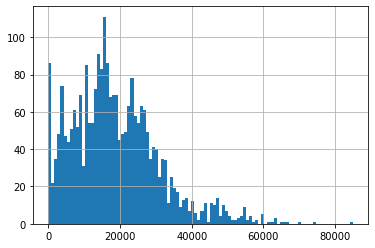

In [12]:
df['price'].hist(bins=100)

The data looks few skewed with the possible existence of outliers.
Zero values obviously not good for our exploring. So we determine to drop all rows which has price value less than or equal $200 by passing indexes of the values to be dropped.

In [13]:
# Get names of indexes for which column price has value less than $ 200
indexNames = df[ df['price'] <= 200 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df[df['price']==df['price'].min()]

,price,brand,model,year,title_status,mileage,color,lot,state
335,225,chevrolet,door,2014,salvage insurance,87673.0,red,167650668,colorado


The age of the car definitely effects the prices and we think it will be more useful instead of the model year of the car, it makes more sense to use it as age. So we substituted ‘year’ column from current year 2020.

In [14]:
#Add new column express the age of the car
df['age'] = 2020 - df['year']
df.head(2)

,price,brand,model,year,title_status,mileage,color,lot,state,age
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,12
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,9


### Cleaning Data Summary

- Drop unnecessary columns
- Drop column with repetitive values.
- Drop values that less then $200 in price column.
- Add age of car column

# Data Wrangling and visualization
### Exploratory Data Analysis

- Distribution of price vs. the Year of Registration. 
- Distribution of price vs. different mileage levels.
- Find the other properties that are associated with price.
- General observations.



##  Distribution of Price vs.  the Year of Registration

Frist lets take a look of  year distrbuation

Text(0.5, 1.0, 'Frequency Distribution Plot of Year')

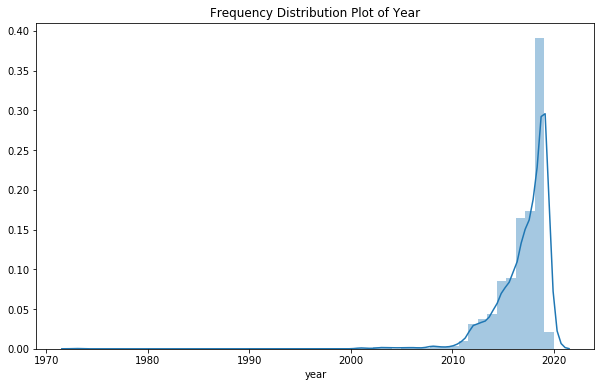

In [15]:
x = df.year
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Year')

It can be seen from the graph there are many outliers. Data is left-skewed. To get better accuracy, we also drop all cars that manufactured before 2000

After that we plot boxplot to show how the price can changes with a year of registration. 

In [16]:
#drop all cars that regestration before 2000

indexNames_2 = df[ df['year'] < 2000 ].index
df.drop(indexNames_2 , inplace=True)


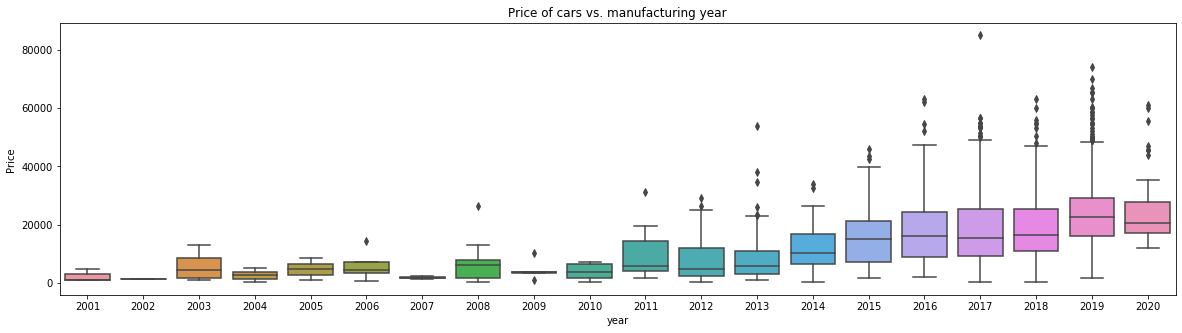

In [17]:
# plot chart to show the relation bwteen the year and price

plt.figure(figsize=(20,5))
sns.boxplot(x="year", y="price", data = df)
plt.title("Price of cars vs. manufacturing year")
plt.ylabel("Price ")
plt.show()

In [18]:

bins= [0,10,20]
labels = ['Modren','classic']
df['Car_Classification'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head(3)

,price,brand,model,year,title_status,mileage,color,lot,state,age,Car_Classification
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,12,classic
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,9,Modren
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,2,Modren


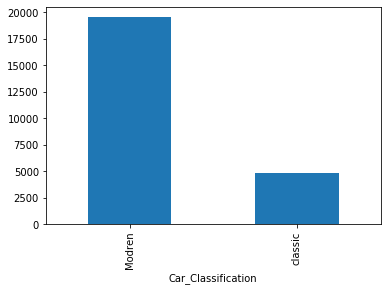

In [19]:
df.groupby('Car_Classification')['price'].mean().plot(kind='bar')
plt.show()

Using these criteria above on the graph , we can easily observe that most offers cars in auction are modern and also the most expensive value too, and For classic cars there are small sample and it less expensive than modren.

## Distribution of Price vs. Different Mileage Levels

Mileage value shows how much the car has been driven, so it is definitely an important factor determining the price, because mileage is one of the most important pieces of information when it comes to the car auction .<br>
The relationship between mileage and price which we think is highly correlated.<br>

This leads us to find out the distribution of price in terms of different mileage levels. Due to the mileage data has a large range of number and for more specific that, we decide to divide the mileage status level into 3 categories (low -medium-high)


In [20]:

def cut_into_level(dfname ,column_name):
    min_value = dfname[column_name].min()
    first_value = dfname[column_name].describe()[4]
    second_value = dfname[column_name].describe()[5]
    max_value = dfname[column_name].max()
    
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_value, second_value, max_value]
# Labels for the four three level groups of Mileage Status.
    bin_names = [ 'low', 'medium', 'high'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname



Now we filterd data frame with recent five years and then applied the function

In [21]:
#choose the recent five years 
dfyear =[2016,2017,2018,2019,2020]
#creat a empty dataframe,df_q2
new_df = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    dfn = df.query('year == "%s"' % year) 
    dfn2 = cut_into_level(dfn,'mileage')
    new_df = new_df.append(dfn2) #append dfn2 to df_q2
  

/Users/yazeed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Here we grouped the data frame new_df with each mileage levels in each year

In [22]:
new_df_summary = new_df.groupby(['year','mileage_levels']).median()
cols = new_df_summary.columns.tolist()
#move the column 
cols.insert(0, cols.pop(cols.index('mileage')))
new_df_summary = new_df_summary.reindex(columns= cols)
new_df_summary.tail(9)

mileage    price          lot  age
year mileage_levels                                    
2018 low             14750.0  26000.0  167749173.0  2.0
     medium          33048.0  16500.0  167749268.0  2.0
     high            42250.0  13900.0  167749248.0  2.0
2019 low             11437.0  23600.0  167745054.0  1.0
     medium          18856.0  25000.0  167744937.0  1.0
     high            31713.0  17800.0  167751694.5  1.0
2020 low               928.5  24300.0  167750448.0  0.0
     medium          10334.0  19200.0  167722321.0  0.0
     high            15160.0  19800.0  167725016.0  0.0

                  price                  
mileage_levels      low   medium     high
year                                     
2016            21500.0  18600.0  13270.0
2017            24205.5  13250.0  13600.0
2018            26000.0  16500.0  13900.0
2019            23600.0  25000.0  17800.0
2020            24300.0  19200.0  19800.0


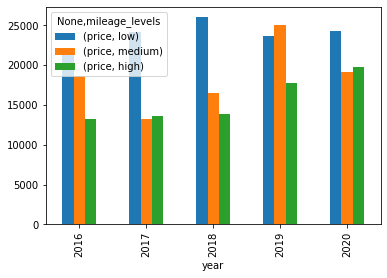

In [23]:
new_df_summary_pop = new_df_summary[['price']].unstack()
print(new_df_summary_pop)
new_df_summary_pop.plot.bar()

In the bar chart above is clearly seen the Reverse relations between the mileage levels and the price. and the the highest price associated with low mileage was with registration year of 2018.

So according to the result, we infer that a high price car is always with a low mileage car<br>
Now let's see the relation in general by applying the regression plot.

Text(0.5, 1.0, 'mileage vs Price')

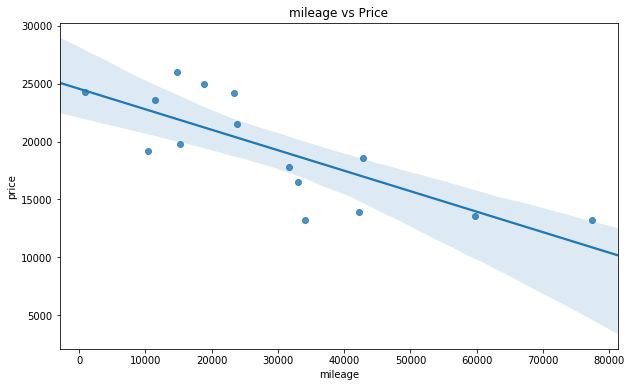

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(x='mileage', y='price', data=new_df_summary).set_title('mileage vs Price')

It is clearly seen the corrleation as the miileage goes up, the price goes down.

## Find the factors that are associated with price
###  Car Title Status

Something that can be important to overlook when you buy for a used car is the status of the title

so, lets take an overview of car title in the acution and we use a pie chart to detect the percentage

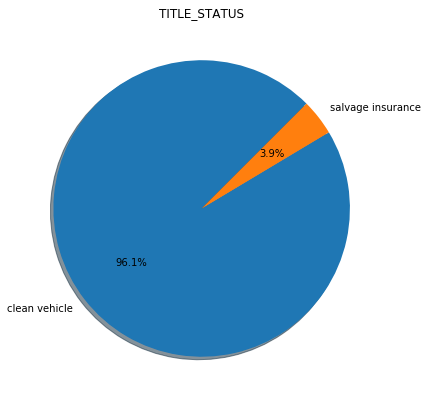

In [25]:
pie = ['title_status']

fig = plt.figure(figsize = (15,15))
axes = 220
for p in pie:
    axes += 1
    fig.add_subplot(axes)
    plt.pie(df[p].value_counts(), labels=df[p].unique(),autopct='%1.1f%%', shadow=True, startangle=45);
    plt.title(p.upper())
plt.show()

The pie cahrt above show the most car in the auction is clean title with 96% and 
we believe that a salvage insurance has a permanent negative effect on the value
and it's decreases a vehicle's value sometime up to 50% </br>

To detect the correlation we use a bar chart 

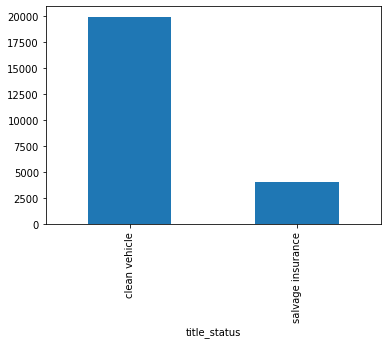

In [26]:
df.groupby('title_status')['price'].mean().plot(kind='bar')
plt.show()

### Cars location

In [27]:
print('number of state',df.state.nunique())

a = df.state.value_counts() [:10]
df_location = pd.DataFrame({"count": a , "persentage %": (a/2499)*100})
print (df_location.sum())
df_location

number of state 43
count           1644.000000
persentage %      65.786315
dtype: float64


,count,persentage %
pennsylvania,297,11.884754
florida,243,9.723890
texas,205,8.203281
california,184,7.362945
michigan,166,6.642657
north carolina,145,5.802321
minnesota,115,4.601841
illinois,109,4.361745
wisconsin,93,3.721489
new jersey,87,3.481393


There are 43 different cities but 65% of all cars are listed in top 10 cities with pennsylvania having 11% of all cars.
Now let's see the average price distribution based on each state

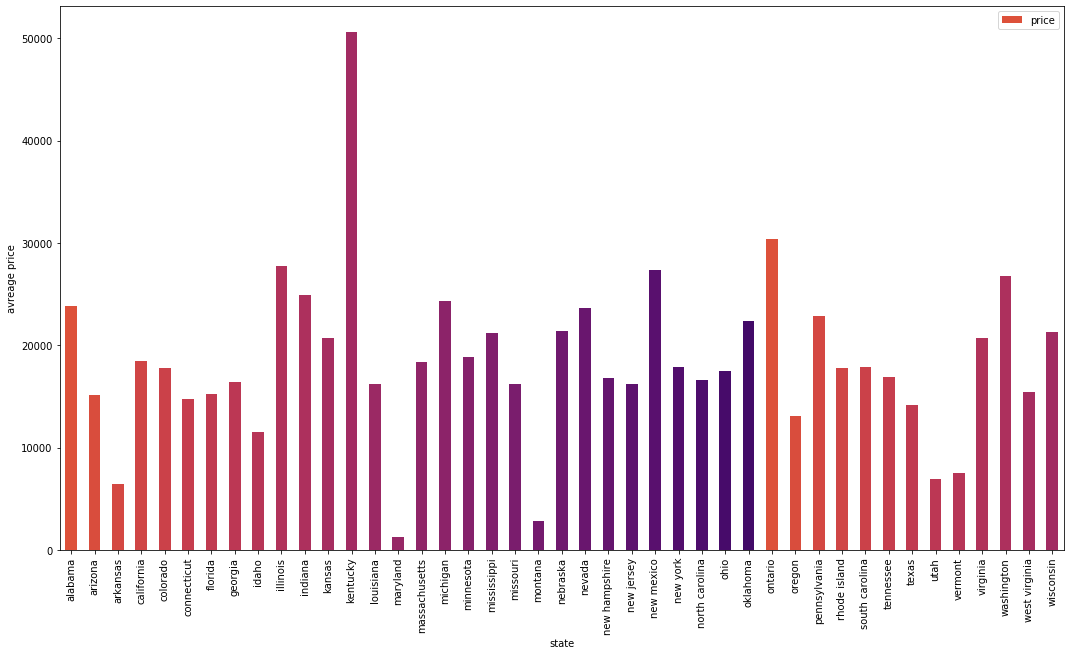

In [28]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))
plt.figure()
an=df.groupby(['state'])['price'].mean().plot(kind='bar',stacked=True, figsize=(18,10), color=color)
an.set_xlabel('state')
an.set_ylabel('avreage price')
an.legend(loc='best')
plt.show()

The bar chart above showes the corrlation between the price and state, The most expensive cars that are from Kentucky .

# General observations

## Cars Brand
we are limit our results to the five most common values in car brands.


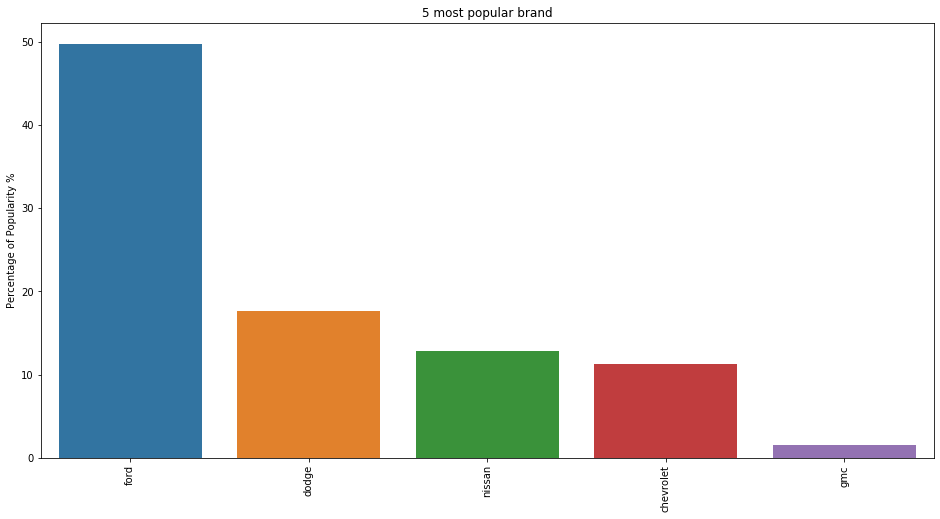

In [29]:
BrandOfCars = df["brand"].value_counts().div(len(df)).mul(100)
brand_top5 = BrandOfCars[:5]

plt.figure(figsize=(16,8))
sns.barplot(x=brand_top5.index, y=brand_top5.values)
plt.title("5 most popular brand")
plt.ylabel("Percentage of Popularity %")
plt.xticks(rotation=90)
plt.show()

As we can see the first place was taken by American companies (Ford ) with 49 % and then Dodges with 18 % ,  Nissans 15 %, Chevrolets 14%, and fainally GMCs 4 %.

Let’s generate bar chart for price and brand 

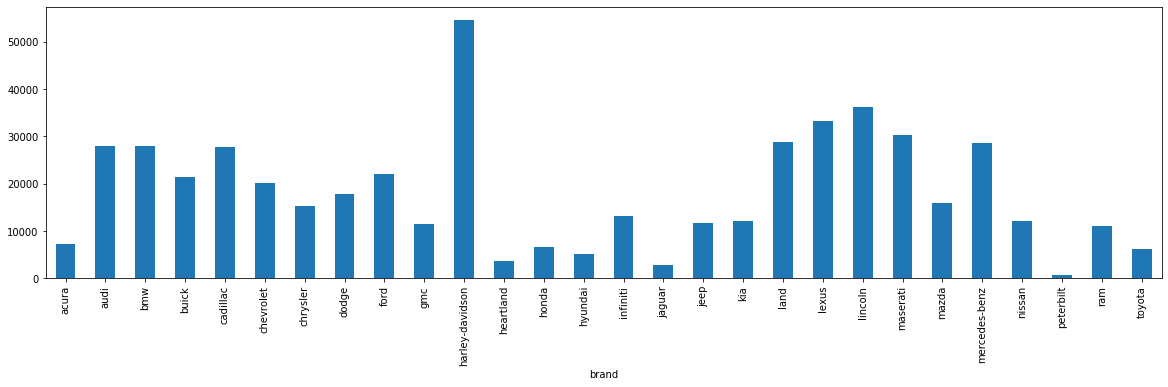

In [30]:
plt.figure(figsize=(20,5))
df.groupby('brand')['price'].mean().plot(kind='bar')


Here as shown the most expinsive car is harley davidson for more than 50000 USD and cheapest one is peterbilt with less than 1000 USD

## Cars Color

In [31]:
color_top5 = df['color'].value_counts().iloc[:5]
color_top5


white     694
black     506
gray      386
silver    293
red       185
Name: color, dtype: int64

In [32]:
x = color_top5
df_color = pd.DataFrame({"count": x , "persentage %": (x/2499)*100})
print (df_color.sum())
df_color

count           2064.000000
persentage %      82.593037
dtype: float64


,count,persentage %
white,694,27.771108
black,506,20.248099
gray,386,15.446178
silver,293,11.724690
red,185,7.402961


It seems like the optimal choice of color is white, 27 % of the cars are white followed by black and gray. Top 5 colors cover 82% of all cars color.

# Correlation Map:

Another way to check relationship between variables is correlation matrix. Pandas corr() function calculates correlation between all numerical variables in our dataset.

In [33]:
df.corr()

,price,year,mileage,lot,age
price,1.000000,0.394450,-0.369855,0.125565,-0.394450
year,0.394450,1.000000,-0.628043,0.095086,-1.000000
mileage,-0.369855,-0.628043,1.000000,-0.094643,0.628043
lot,0.125565,0.095086,-0.094643,1.000000,-0.095086
age,-0.394450,-1.000000,0.628043,-0.095086,1.000000


The closer the value is to 1, the higher the correlation. ‘-’ sign indicates negative correlation. These values are inline with the regression plots above. We can also visualize the correlation matrix using seaborn heatmap:

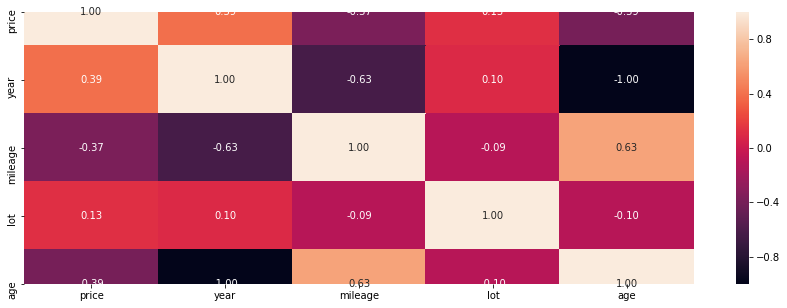

In [34]:
df.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

import seaborn as sns
corr = df.corr()
plt.figure(figsize=(15,5))
a = sns.heatmap(corr, annot=True, fmt='.2f')

# Conclusion


car and the mileage. 
In the case of year of regestration, the more recent the year is more expensive the car is.
In conclusion, we established the correlation relation between price, mileage, age and year features of the datasets.  The +1 shows the highest correction between the two features and the negative value as in the correlation map denotes the negative correlation. 

